In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('complaints.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'complaints.csv'

In [4]:
data = pd.read_csv('complaints.csv')


In [5]:
data.head()


,Product,Company,Issue,Date received,Consumer complaint narrative
0,Credit card,CREDIT INC,Billing dispute,2023-01-05,I was charged twice for the same transaction o...
1,Mortgage,HOUSE FIN CORP,Loan modification,2023-02-10,The lender did not process my request for loan...
2,Bank account,BANK OF MONEY,Unauthorized transaction,2023-03-15,Someone accessed my account and withdrew money...
3,Credit card,CREDIT INC,High interest rates,2023-03-22,Interest rates were raised without proper notice.
4,Mortgage,LOANZILLA,Incorrect information on credit report,2023-04-01,My mortgage account shows wrong information on...


In [6]:
data.columns


Index(['Product', 'Company', 'Issue', 'Date received',
       'Consumer complaint narrative'],
      dtype='object')

In [7]:
# Remove duplicate rows
data = data.drop_duplicates()

# Remove rows with null values in important columns
data = data.dropna(subset=['Product', 'Company', 'Issue', 'Date received'])
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [8]:
data['date_received'] = pd.to_datetime(data['date_received'])
data['product'].unique()
data['product'] = data['product'].str.lower().str.strip()
# You can map or replace inconsistent categories here if needed


In [9]:
complaints_by_product = data['product'].value_counts()
print(complaints_by_product)
complaints_by_company = data['company'].value_counts().head(10)
print(complaints_by_company)


product
credit card     2
mortgage        2
bank account    1
Name: count, dtype: int64
company
CREDIT INC        2
HOUSE FIN CORP    1
BANK OF MONEY     1
LOANZILLA         1
Name: count, dtype: int64


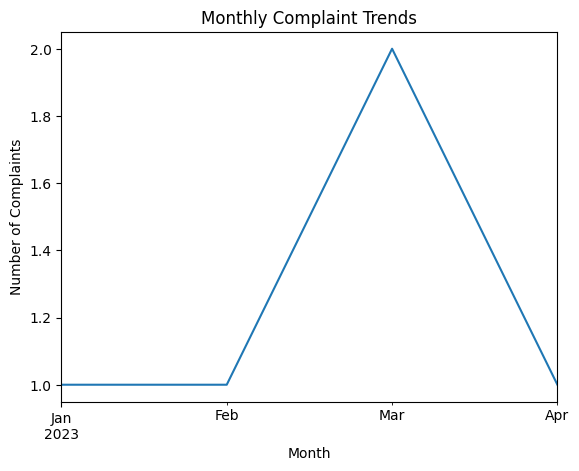

In [10]:
data['year_month'] = data['date_received'].dt.to_period('M')
monthly_trends = data.groupby('year_month').size()
monthly_trends.plot(kind='line')
plt.title("Monthly Complaint Trends")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.show()


In [11]:
from collections import Counter
import re

# Combine all complaint narratives into one string
all_text = ' '.join(data['consumer_complaint_narrative'].dropna().tolist()).lower()

# Split into words, remove punctuation
words = re.findall(r'\b\w+\b', all_text)

# Count frequency
word_counts = Counter(words)

# Most common 10 words
print(word_counts.most_common(10))


[('my', 5), ('the', 3), ('for', 2), ('on', 2), ('credit', 2), ('account', 2), ('without', 2), ('i', 1), ('was', 1), ('charged', 1)]


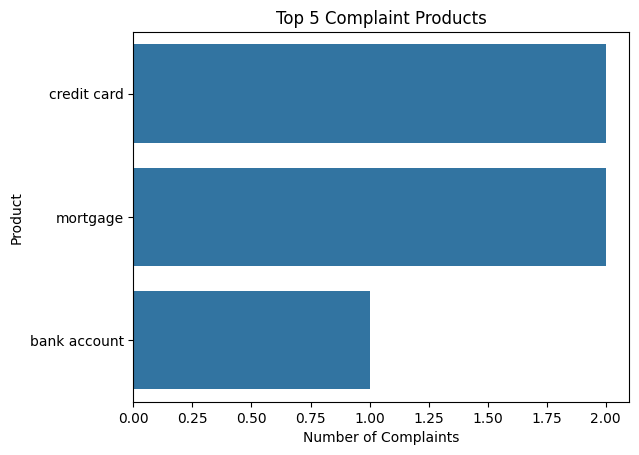

KeyError: 'complaint_status'

In [12]:
top5 = complaints_by_product.head(5)
sns.barplot(x=top5.values, y=top5.index)
plt.title('Top 5 Complaint Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()
status_counts = data['complaint_status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Complaint Resolution Status')
plt.ylabel('')
plt.show()
